In [1]:
import sqlalchemy as db
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly as py
from sklearn.cluster import KMeans


## Carguemos la información 

## Incrementaremos la base de datos

In [2]:
movie_data = pd.read_excel(r"./data/movie.xlsx", names= ['movieId', 'title', 'gender', 'releaseDate', 'ParticipantName','Roleparticipant', 'AwardMovie'])
movie_data.head()

,movieId,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie
0,32898,"Trip to the Moon, A (Voyage dans la lune, Le)",Action,1902-01-01,Director,Actor,Grammy
1,7065,"Birth of a Nation, The",Drama,1915-01-01,Director,Director,Sin Info
2,7243,Intolerance: Love's Struggle Throughout the Ages,Drama,1916-01-01,Director,Actor,Oscar
3,62383,"20,000 Leagues Under the Sea",Action,1916-01-01,Director,Director,Oscar
4,8511,"Immigrant, The",Comedy,1917-01-01,Director,Actor,Sin Info


In [3]:
users = pd.read_csv(r"./data/users2.csv",sep=";").drop_duplicates()
users.head()

,idUser,username,country
0,1,NaN,NaN
20,2,NaN,NaN
96,3,NaN,NaN
147,4,NaN,NaN
351,5,NaN,NaN


In [4]:
watchs_data = pd.read_csv(r"./data/Awards_moviev2.csv",sep=";",usecols=["idUser","movieId","rating"])
watchs_data.head()

,idUser,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [5]:
movies_data=watchs_data.merge(movie_data, on="movieId", how="left")
movies_data.head()

,idUser,movieId,rating,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie
0,1,31,2.5,Dangerous Minds,Drama,1995-01-01,Director,Director,Oscar
1,1,1029,3.0,Dumbo,Animation,1941-01-01,Director,Director,Oscar
2,1,1061,3.0,Sleepers,Thriller,1996-01-01,Director,Director,Sin Info
3,1,1129,2.0,Escape from New York,Action,1981-01-01,Actor,Director,Oscar
4,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso),Drama,1989-01-01,Director,Actor,Grammy


In [6]:
tabla_model = pd.pivot_table(movies_data, values='rating', index=['idUser'], columns=['gender'], aggfunc="mean").reset_index()
tabla_model.head()

gender,idUser,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2.800000,1.900000,3.000000,NaN,3.000000,NaN,NaN,2.600000,3.5,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN
1,2,3.315789,4.000000,4.000000,3.333333,3.086957,3.500000,NaN,3.947368,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN
2,3,3.468750,3.250000,2.750000,2.500000,3.722222,3.625000,3.666667,3.950000,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.274194,4.266667,4.923077,4.416667,4.312500,4.363636,5.000000,4.533333,NaN,5.0,3.9,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4.000000,3.692308,4.333333,4.000000,4.024390,3.083333,3.500000,3.944444,NaN,NaN,4.0,5.0,NaN,NaN,NaN,3.5,NaN,NaN


# Repliquemos lo anterior

In [7]:
# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tabla_model['Action'],
    y=tabla_model['Adventure'],
    z=tabla_model['Drama'],
    mode='markers',
    marker=dict(
        size=8,
        color='cyan',  # Color by the 'Drama' dimension
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    title='3D Plot of Action, Adventure, Drama',
    scene=dict(
        xaxis_title='Action',
        yaxis_title='Adventure',
        zaxis_title='Drama'
    ),
    width=900,  # Ancho del gráfico
    height=600  # Altura del gráfico
)

fig.show()

In [8]:
X1 = tabla_model[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']].fillna(0).iloc[: , :].values
inertia = []
for n in range(1 , 11):
       algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 20 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
       algorithm.fit(X1)
       inertia.append(algorithm.inertia_)

c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.

c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



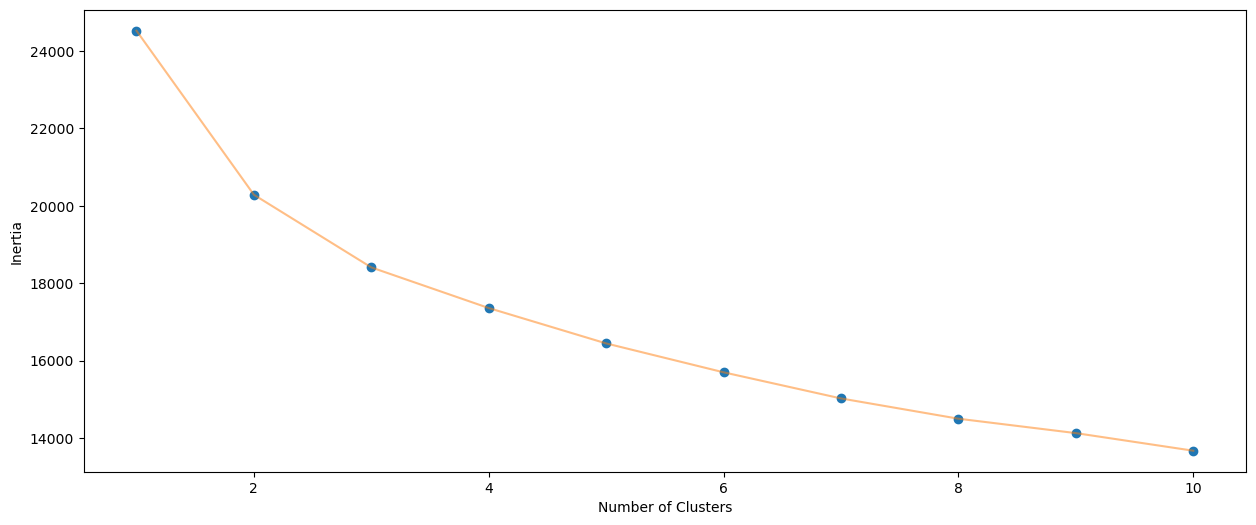

In [9]:
import matplotlib.pyplot as plt 

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [10]:
# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=4, random_state=0)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(tabla_model[['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']].fillna(0))

c:\Users\jorge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [11]:
tabla_model['Cluster'] = predictions

In [12]:
# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=tabla_model['Action'],
    y=tabla_model['Adventure'],
    z=tabla_model['Drama'],
    mode='markers',
    marker=dict(
        size=8,
        color=predictions,  # Color by the 'Drama' dimension
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    title='3D Plot of Action, Adventure, Drama',
    scene=dict(
        xaxis_title='Action',
        yaxis_title='Adventure',
        zaxis_title='Drama'
    ),
    width=900,  # Ancho del gráfico
    height=600  # Altura del gráfico
)

fig.show()

## Como funciona el filtro colectivo

La idea detras del filtro colectivo, es que podamos primero encontrar similitudes entre las personas, en el caso anterior, encontraremos grupos en funcion de los generos que mas les gusta ver. A partir de ello, en cada cluster buscaremos las peliculas mas rankeadas, y lo que haremos es bridarle a cada usuario la lista de peliculas que aun no ha visto pero que su cluster si lo haya visto y tenga un buen puntaje

In [13]:
movies_datacluster = movies_data.merge(tabla_model[['idUser','Cluster']],on='idUser',how='left')
movies_datacluster.head()

,idUser,movieId,rating,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie,Cluster
0,1,31,2.5,Dangerous Minds,Drama,1995-01-01,Director,Director,Oscar,1
1,1,1029,3.0,Dumbo,Animation,1941-01-01,Director,Director,Oscar,1
2,1,1061,3.0,Sleepers,Thriller,1996-01-01,Director,Director,Sin Info,1
3,1,1129,2.0,Escape from New York,Action,1981-01-01,Actor,Director,Oscar,1
4,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso),Drama,1989-01-01,Director,Actor,Grammy,1


## ¿Como funciona el filtro?

Imaginemos que queremos recomendarle peliculas al usuario 101, que peliculas le recomendarian

In [14]:
movies_datacluster[movies_datacluster["idUser"]==101]

## Tenemos el cluster 13

,idUser,movieId,rating,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie,Cluster
15298,101,145,3.5,Bad Boys,Action,1995-01-01,Director,Director,Oscar,0
15299,101,163,2.5,Desperado,Action,1995-01-01,Director,Director,Oscar,0
15300,101,172,2.5,Johnny Mnemonic,Action,1995-01-01,Actor,Director,Oscar,0
15301,101,196,3.5,Species,Horror,1995-01-01,Director,Actor,Sin Info,0
15302,101,260,4.0,Star Wars: Episode IV - A New Hope,Action,1977-01-01,Actor,Director,Sin Info,0
15303,101,315,2.0,"Specialist, The",Action,1994-01-01,Director,Actor,Grammy,0
15304,101,318,4.0,"Shawshank Redemption, The",Crime,1994-01-01,Actor,Director,Oscar,0
15305,101,370,2.5,Naked Gun 33 1/3: The Final Insult,Action,1994-01-01,Actor,Director,Grammy,0
15306,101,457,3.5,"Fugitive, The",Thriller,1993-01-01,Actor,Director,Oscar,0
15307,101,520,2.5,Robin Hood: Men in Tights,Comedy,1993-01-01,Actor,Director,Oscar,0


In [15]:
## Top peliculas cluster 0
ranking_cluster0 = movies_datacluster[movies_datacluster["Cluster"]==0].groupby(['title'])["rating"].mean().sort_values(ascending=False)
ranking_cluster0 = ranking_cluster0.reset_index()
ranking_cluster0

,title,rating
0,Rosencrantz and Guildenstern Are Dead,5.0
1,Amazing Grace,5.0
2,Son of Frankenstein,5.0
3,Lake Placid,5.0
4,Lamerica,5.0
...,...,...
3671,"Christmas Carol, A",0.5
3672,Return of the Living Dead Part II,0.5
3673,Meet the Feebles,0.5
3674,Tekkonkinkreet (Tekkon kinkurîto),0.5


In [16]:
## ¿que peliculas ya vio el usuaruo 101 
movies_datacluster[movies_datacluster["idUser"]==101]["title"]

15298                                            Bad Boys 
15299                                           Desperado 
15300                                     Johnny Mnemonic 
15301                                             Species 
15302                  Star Wars: Episode IV - A New Hope 
15303                                     Specialist, The 
15304                           Shawshank Redemption, The 
15305                  Naked Gun 33 1/3: The Final Insult 
15306                                       Fugitive, The 
15307                           Robin Hood: Men in Tights 
15308                                    Schindler's List 
15309                                        Blade Runner 
15310                          Terminator 2: Judgment Day 
15311                                          Striptease 
15312                                            Die Hard 
15313      Star Wars: Episode V - The Empire Strikes Back 
15314    Raiders of the Lost Ark (Indiana Jones and the.

In [17]:
## ¿Que peliculas no ha visto, le recomendaremos 101 peliculas?
ranking_cluster0[~ranking_cluster0['title'].isin(movies_datacluster[movies_datacluster["idUser"]==101]["title"])][0:10]

,title,rating
0,Rosencrantz and Guildenstern Are Dead,5.0
1,Amazing Grace,5.0
2,Son of Frankenstein,5.0
3,Lake Placid,5.0
4,Lamerica,5.0
5,"Mirror Has Two Faces, The",5.0
6,Miracle Mile,5.0
7,Land and Freedom (Tierra y libertad),5.0
8,The Witch,5.0
9,Amarcord,5.0


### ¿ Y si, hacemos un modolo de clusterizacion mas complejo?

Cree unas funciones que permiten agilizar la corrida del modelo

In [18]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    missing_values_count = user_movie_ratings.isnull().sum()

    sorted_columns = missing_values_count.sort_values().index.tolist()
    
    user_movie_ratings_sorted =user_movie_ratings[sorted_columns]
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

## Cargamos la información similar al caso anterior, sin embargo aqui haremos que cada pelicula sea una columna

In [19]:
user_movie_ratings=pd.pivot_table(movies_data, values='rating', index=['idUser'],columns=['title'], aggfunc="mean")
user_movie_ratings

title,"""Great Performances"" Cats",$9.99,'Hellboy': The Seeds of Creation,'Neath the Arizona Skies,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,...,"Zorro, the Gay Blade",Zulu,[REC],eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us),İtirazım Var
idUser,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Esta funcion les permitira poder observar solo el grupo de peliculas mas vistas por lo que no se veran tantos nulls

In [20]:
n_movies = 30
n_users = 10
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)

dataset dimensions:  (10, 30)


In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    # Reverse to match the order of the printed dataframe
    #most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')

    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

Visualizaremos lo anterior de una mejor manera con esta funcion

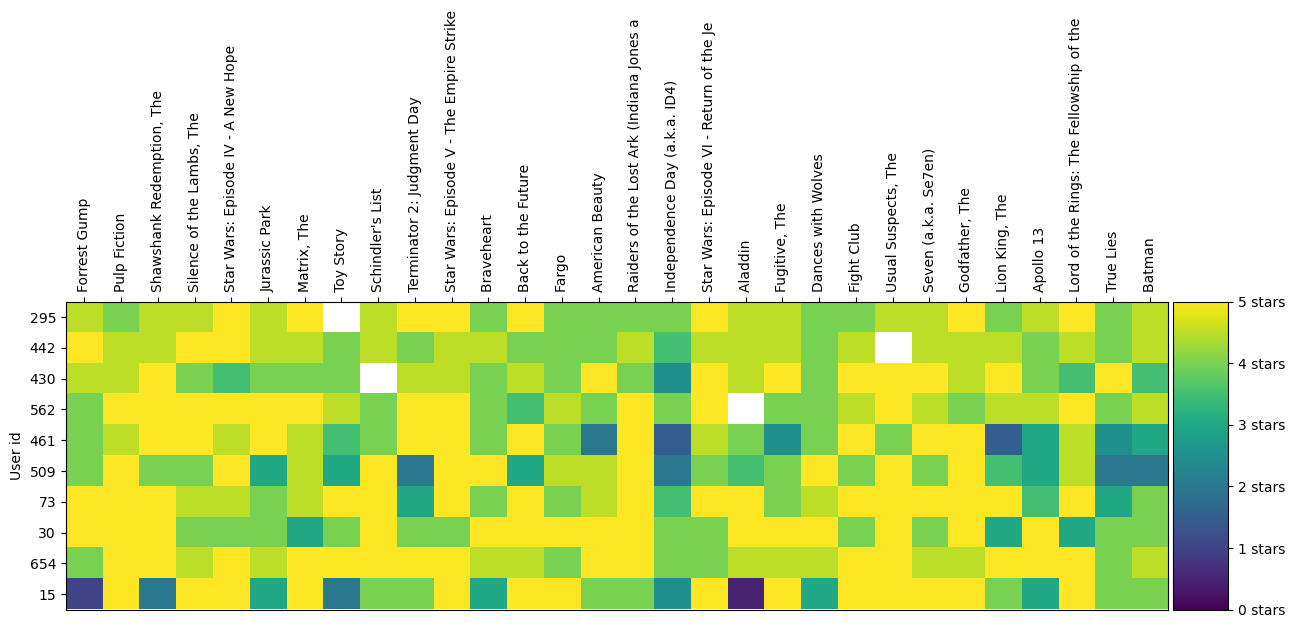

In [22]:
draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True)

Para no demorar procesando toda la informacion, reduciremos los datos a una muestra de solo 1000 peliculas con mas vistas

In [23]:
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)

Ahora crearemos una matriz para poder generar cluster a partir de la informacion del puntaje de todas las peliculas que han visto

In [24]:
from scipy.sparse import csr_matrix
for column in most_rated_movies_1k.columns:
    most_rated_movies_1k[column] = pd.arrays.SparseArray(most_rated_movies_1k[column], dtype=pd.SparseDtype("float", 0))
most_rated_movies_1k = most_rated_movies_1k.fillna(0)

In [25]:
sparse_ratings = csr_matrix(most_rated_movies_1k.sparse.to_coo())

In [26]:
predictions = KMeans(n_clusters=20, algorithm='lloyd').fit_predict(sparse_ratings)

In [27]:
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
#helper.draw_movie_clusters(clustered, max_users, max_movies)

In [28]:
clustered

,idUser,Forrest Gump,Pulp Fiction,"Shawshank Redemption, The","Silence of the Lambs, The",Star Wars: Episode IV - A New Hope,Jurassic Park,"Matrix, The",Toy Story,Schindler's List,...,"Sword in the Stone, The","Brothers McMullen, The",Moonrise Kingdom,Watchmen,And Your Mother Too (Y tu mamá también),"Motorcycle Diaries, The (Diarios de motocicleta)",Airheads,"Waterboy, The",Battle Royale (Batoru rowaiaru),group
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,3.0,4.0,0,3.0,0,4.0,0,0,4.0,...,0,3.0,0,0,0,0,0,0,0,14
2,3,5.0,4.5,5.0,3.0,0,0,0,0,3.0,...,0,0,0,0,0,0,0,0,0,1
3,4,5.0,5.0,0,0,5.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
4,5,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,667,4.0,5.0,0,0,0,4.0,0,0,0,...,0,5.0,0,0,0,0,0,0,0,14
667,668,0,5.0,4.0,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
668,669,0,0,0,0,5.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
669,670,0,0,5.0,5.0,0,0,4.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
movies_datacluster_peliculas = movies_data.merge(clustered[['idUser','group']],on='idUser',how='left')

Veamos al usuario 11 y veamos que cluster tiene

In [30]:
movies_datacluster_peliculas [movies_datacluster_peliculas ["idUser"]==101]

,idUser,movieId,rating,title,gender,releaseDate,ParticipantName,Roleparticipant,AwardMovie,group
15298,101,145,3.5,Bad Boys,Action,1995-01-01,Director,Director,Oscar,11
15299,101,163,2.5,Desperado,Action,1995-01-01,Director,Director,Oscar,11
15300,101,172,2.5,Johnny Mnemonic,Action,1995-01-01,Actor,Director,Oscar,11
15301,101,196,3.5,Species,Horror,1995-01-01,Director,Actor,Sin Info,11
15302,101,260,4.0,Star Wars: Episode IV - A New Hope,Action,1977-01-01,Actor,Director,Sin Info,11
15303,101,315,2.0,"Specialist, The",Action,1994-01-01,Director,Actor,Grammy,11
15304,101,318,4.0,"Shawshank Redemption, The",Crime,1994-01-01,Actor,Director,Oscar,11
15305,101,370,2.5,Naked Gun 33 1/3: The Final Insult,Action,1994-01-01,Actor,Director,Grammy,11
15306,101,457,3.5,"Fugitive, The",Thriller,1993-01-01,Actor,Director,Oscar,11
15307,101,520,2.5,Robin Hood: Men in Tights,Comedy,1993-01-01,Actor,Director,Oscar,11


 Seleccionamos un cluster 16 y calculamos los puntajes medios y lo rankeamos

In [31]:
top_peliculas = clustered[clustered["group"]==11][clustered.columns[1: len(clustered.columns) -1]].mean().reset_index().sort_values(0,ascending=False)
top_peliculas.columns = ["title","ranking"]
top_peliculas

,title,ranking
6,"Matrix, The",3.461039
4,Star Wars: Episode IV - A New Hope,3.084416
10,Star Wars: Episode V - The Empire Strikes Back,3.077922
17,Star Wars: Episode VI - Return of the Jedi,2.753247
2,"Shawshank Redemption, The",2.5
...,...,...
698,National Treasure,0
744,Michael,0
763,Kung Fu Panda,0
860,Harry Potter and the Half-Blood Prince,0


¿Qué peliculas vio el usuario 11?

In [32]:
movies_datacluster_peliculas [movies_datacluster_peliculas ["idUser"]==101]["title"]

15298                                            Bad Boys 
15299                                           Desperado 
15300                                     Johnny Mnemonic 
15301                                             Species 
15302                  Star Wars: Episode IV - A New Hope 
15303                                     Specialist, The 
15304                           Shawshank Redemption, The 
15305                  Naked Gun 33 1/3: The Final Insult 
15306                                       Fugitive, The 
15307                           Robin Hood: Men in Tights 
15308                                    Schindler's List 
15309                                        Blade Runner 
15310                          Terminator 2: Judgment Day 
15311                                          Striptease 
15312                                            Die Hard 
15313      Star Wars: Episode V - The Empire Strikes Back 
15314    Raiders of the Lost Ark (Indiana Jones and the.

¿Qué peliculas el recomendamos con el nuevo modelo al usuario 11?

In [33]:
top_peliculas[ ~top_peliculas["title"].isin(movies_datacluster_peliculas[movies_datacluster_peliculas ["idUser"]==101]["title"])].sort_values("ranking",ascending=False)[0:10]

,title,ranking
1,Pulp Fiction,2.402597
14,American Beauty,2.298701
0,Forrest Gump,2.272727
3,"Silence of the Lambs, The",2.155844
21,Fight Club,2.097403
13,Fargo,1.961039
44,"Princess Bride, The",1.954545
33,Men in Black (a.k.a. MIB),1.915584
22,"Usual Suspects, The",1.850649
39,Shrek,1.779221
